In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('insurance_claims.csv')

# The EDA will be focused on determining correlations of 'Fraud Reported' within groups:  

* Months as Customer  
* Age  
* State Policy Held In  
* Insured Sex  
* Insured Education Level   
* Incident Date  
* Incident Type  
* State Incident Occurred In  
* Number of Witnesses  
* Total Claim Amount  


**All events in dataset occurred between January 1 2015 and March 1 2015**

In [6]:
# create dataframe of only features in EDA
df = df[[
    'months_as_customer', 'age', 'policy_state', 'insured_sex', 'insured_education_level',
    'incident_date', 'incident_type', 'incident_state', 'witnesses', 'total_claim_amount'    
]]

In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Insured Age Analysis

**Segment customer's age to identify possible trends of fraud and visualize data**

**Customers over the age of 50 have the highest rate of fraud reported**  
* Age range (19 - 30) = 23.35%      
* Age range (31 - 40) = 23.74%      
* Age range (41 - 50) = 24.57%      
* Age range (51 - 60) = 31.25%      
* Age range (61 - 64) = 27.78%      

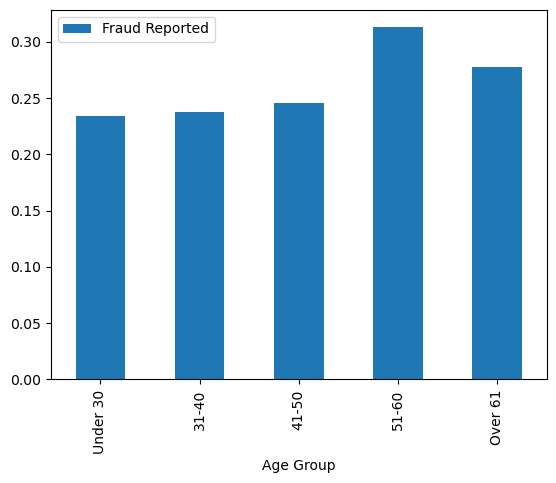

In [238]:
# create a new dataframe with fraud counts for all age groups
fraud_df = pd.DataFrame({
    'Age Group': ['Under 30', '31-40', '41-50', '51-60', 'Over 61'],
    'Fraud Reported': [fraud_counts[1], fraud_counts1[1], fraud_counts2[1], fraud_counts3[1], fraud_counts4[1]],
    'Not Reported': [fraud_counts[0], fraud_counts1[0], fraud_counts2[0], fraud_counts3[0], fraud_counts4[0]]
})

# plot the data
# fraud_df.plot(x='Age Group', y=['Fraud Reported', 'Not Reported'], kind='bar')
fraud_df.plot(x='Age Group', y=['Fraud Reported'], kind='bar')

plt.show()

In [209]:
"""In age group under 31, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/Print variable for percentage of (fraud/no fraud) reported in customer group
fraud_counts = df[df.age <= 30].fraud_reported.value_counts(normalize=True)
print('Percent of Insured Under Age 31 Where Fraud Was Reported/Not Reported:')
print('{:<15} {:<10}'.format('Fraud', 'Percent'))
print('{:<15} {:.2%}'.format('Reported', fraud_counts.values[1]))
print('{:<15} {:.2%}'.format('Not Reported', fraud_counts.values[0]))

# Number of Insured in this age group
print('\nNumber of Insured Under Age of 30:')
print((df.age <= 30).sum())
print('-------------------------------------------------------------------------------------')

Percent of Insured Under Age 31 Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        23.35%
Not Reported    76.65%

Number of Insured Under Age of 30:
197
-------------------------------------------------------------------------------------


In [210]:
"""In age group 31 - 40, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/Print variable for percentage of (fraud/no fraud) reported in customer group
fraud_counts1 = df[(df.age >= 31) & (df.age <= 40)].fraud_reported.value_counts(normalize=1)
print('Percent of Insured Age Group 31 - 40 Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', fraud_counts1[1])) 
print('{:<15} {:.2%}'.format('Not Reported', fraud_counts1[0]))

# Number of Insured in this age group
print('\nNumber of Insured Ages 31 - 40:') 
print(((df.age >= 31) & (df.age <= 40)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Insured Age Group 31 - 40 Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        23.74%
Not Reported    76.26%

Number of Insured Ages 31 - 40:
396
-------------------------------------------------------------------------------------


In [211]:
"""In age group 41 - 50, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/Print variable for percentage of (fraud/no fraud) reported in customer group
fraud_counts2 = df[(df.age >= 41) & (df.age <= 50)].fraud_reported.value_counts(normalize=1) 
print('Percent of Insured Age Group 41 - 50 Where Fraud Was Reported/Not Reported:')
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', fraud_counts2[1])) 
print('{:<15} {:.2%}'.format('Not Reported', fraud_counts2[0])) 

# Number of Insured in this age group
print('\nNumber of Insured Ages 41 - 50:') 
print(((df.age >= 41) & (df.age <= 50)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Insured Age Group 41 - 50 Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        24.57%
Not Reported    75.43%

Number of Insured Ages 41 - 50:
293
-------------------------------------------------------------------------------------


In [212]:
"""In age group 51 - 60, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/Print variable for percentage of (fraud/no fraud) reported in customer group
fraud_counts3 = df[(df.age >= 51) & (df.age <= 60)].fraud_reported.value_counts(normalize=True) 
print('Percent of Insured Age Group 51 - 60 Where Fraud Was Reported/Not Reported:')
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', fraud_counts3[1]))
print('{:<15} {:.2%}'.format('Not Reported', fraud_counts3[0])) 

# Number of Insured in this age group
print('\nNumber of Insured Ages 51 - 60:') 
print(((df.age >= 51) & (df.age <= 60)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Insured Age Group 51 - 60 Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        31.25%
Not Reported    68.75%

Number of Insured Ages 51 - 60:
96
-------------------------------------------------------------------------------------


In [213]:
"""In age group over 61, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/Print variable for percentage of (fraud/no fraud) reported in customer group
fraud_counts4 = df[(df.age >= 61)].fraud_reported.value_counts(normalize=1) 
print('Percent of Insured Age Group Over 61 Where Fraud Was Reported/Not Reported:')
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', fraud_counts4[1])) 
print('{:<15} {:.2%}'.format('Not Reported', fraud_counts4[0]))

# Number of Insured in this age group
print('\nNumber of Insured Ages Over 61:') 
print((df.age <=61).sum())
print('-------------------------------------------------------------------------------------')

Percent of Insured Age Group Over 61 Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        27.78%
Not Reported    72.22%

Number of Insured Ages Over 61:
992
-------------------------------------------------------------------------------------


# Insured Length as Customer Analysis

**Segment customers by length of coverage, by 5 year segments, to identify possible trends of fraud and visualize data** 

**Customers insured 26 or more years have the highest rate of fraud reported**  

* Up To 5 years = 24.51%  
* 6 - 10 years  = 25.47%    
* 11 - 15 years = 24.47%    
* 16 - 20 years = 23.39%  
* 21 - 25 years = 21.63%  
* 26 - 30 years = 27.87%  
* 31 - 35 years = 32.65%  
* Over 35 years = 28.33%  

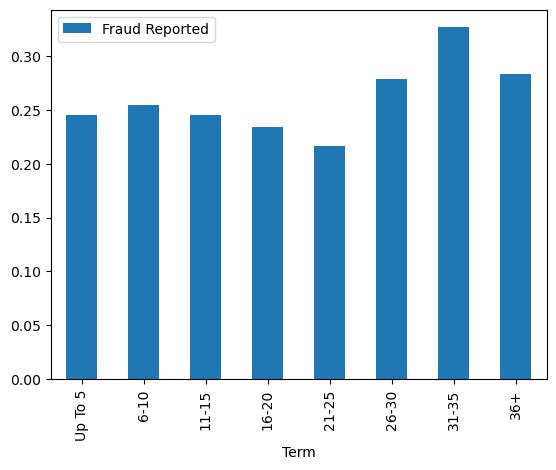

In [242]:
# Create new dataframe for fraud visualization
term = pd.DataFrame({
    'Term': ['Up To 5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36+'],
    'Fraud Reported': [months[1], months1[1], months2[1], months3[1], months4[1], months5[1], months6[1], months7[1]],
    'Not Reported': [months[0], months1[0], months2[0], months3[0], months4[0], months5[0], months6[0], months7[0]]
})

# plot the data
term.plot(x='Term', y=['Fraud Reported'], kind='bar')
plt.show()

In [214]:
"""In group insured up to 5 years, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months = df[df.months_as_customer <= 60].fraud_reported.value_counts(normalize=1)  
print('Percent of Group Insured Up To 5 Years Where Fraud Was Reported/Not Reported:')
print('{:<15} {:<10}'.format('Fraud', 'Percent'))
print('{:<15} {:.2%}'.format('Reported', months[1]))
print('{:<15} {:.2%}'.format('Not Reported', months[0]))

# Number of Customers Insured in this group
print('\nNumber of Customers Insured Up To 5 Years:') 
print((df.months_as_customer <= 60).sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured Up To 5 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        24.51%
Not Reported    75.49%

Number of Customers Insured Up To 5 Years:
102
-------------------------------------------------------------------------------------


In [215]:
"""In group insured 6 - 10 years, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months1 = df[(df.months_as_customer >= 61) & (df.months_as_customer <= 120)].fraud_reported.value_counts(normalize=1) 
print('Percent of Group Insured 6 - 10 Years Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', months1[1])) 
print('{:<15} {:.2%}'.format('Not Reported', months1[0]))

# Number of Insured in this age group
print('\nNumber of Customers Insured 6 - 10 Years:') 
print(((df.months_as_customer >= 61) & (df.months_as_customer <= 120)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured 6 - 10 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        25.47%
Not Reported    74.53%

Number of Customers Insured 6 - 10 Years:
161
-------------------------------------------------------------------------------------


In [216]:
"""In group insured 11 - 15 years, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months2 = df[(df.months_as_customer >= 121) & (df.months_as_customer <= 180)].fraud_reported.value_counts(normalize=1)  
print('Percent of Group Insured 11 - 15 Years Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent'))
print('{:<15} {:.2%}'.format('Reported', months2[1]))
print('{:<15} {:.2%}'.format('Not Reported', months2[0]))

# Number of Insured in this age group
print('\nNumber of Customers Insured 11 - 15 Years:') 
print(((df.months_as_customer >= 121) & (df.months_as_customer <= 180)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured 11 - 15 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        24.47%
Not Reported    75.53%

Number of Customers Insured 11 - 15 Years:
188
-------------------------------------------------------------------------------------


In [217]:
"""In group insured 16 - 20 years, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months3 = df[(df.months_as_customer >= 181) & (df.months_as_customer <= 240)].fraud_reported.value_counts(normalize=1) 
print('Percent of Group Insured 16 - 20 Years Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', months3[1])) 
print('{:<15} {:.2%}'.format('Not Reported', months3[0])) 

# Number of Insured in this age group
print('\nNumber of Customers Insured 16 - 20 Years:') 
print(((df.months_as_customer >= 181) & (df.months_as_customer <= 240)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured 16 - 20 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        23.39%
Not Reported    76.61%

Number of Customers Insured 16 - 20 Years:
171
-------------------------------------------------------------------------------------


In [218]:
"""In group insured 21 - 25 years, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months4 = df[(df.months_as_customer >= 241) & (df.months_as_customer <= 300)].fraud_reported.value_counts(normalize=1)  
print('Percent of Group Insured 21 - 25 Years Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', months4[1])) 
print('{:<15} {:.2%}'.format('Not Reported', months4[0]))

# Number of Insured in this age group
print('\nNumber of Customers Insured 21 - 25 Years:') 
print(((df.months_as_customer >= 241) & (df.months_as_customer <= 300)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured 21 - 25 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        21.63%
Not Reported    78.37%

Number of Customers Insured 21 - 25 Years:
208
-------------------------------------------------------------------------------------


In [219]:
"""In group insured 26 - 30 years, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months5 = df[(df.months_as_customer >= 301) & (df.months_as_customer <= 360)].fraud_reported.value_counts(normalize=1)  
print('Percent of Group Insured 26 - 30 Years Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', months5[1])) 
print('{:<15} {:.2%}'.format('Not Reported', months5[0]))

# Number of Insured in this age group
print('\nNumber of Customers Insured 26 - 30 Years:') 
print(((df.months_as_customer >= 301) & (df.months_as_customer <= 360)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured 26 - 30 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        27.87%
Not Reported    72.13%

Number of Customers Insured 26 - 30 Years:
61
-------------------------------------------------------------------------------------


In [220]:
"""In group insured 31 - 35 years, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months6 = df[(df.months_as_customer >= 361) & (df.months_as_customer <= 420)].fraud_reported.value_counts(normalize=1) 
print('Percent of Group Insured 31 - 35 Years Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', months6[1])) 
print('{:<15} {:.2%}'.format('Not Reported', months6[0])) 

# Number of Insured in this age group
print('\nNumber of Customers Insured 31 - 35 Years:') 
print(((df.months_as_customer >= 361) & (df.months_as_customer <= 420)).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Group Insured 31 - 35 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        32.65%
Not Reported    67.35%

Number of Customers Insured 31 - 35 Years:
49
-------------------------------------------------------------------------------------


In [221]:
"""In group insured over 36, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
months7 = df[(df.months_as_customer > 420)].fraud_reported.value_counts(normalize=1) 
print('Percent of Group Insured Over 36 Years Where Fraud Was Reported/Not Reported:')  
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', months7[1])) 
print('{:<15} {:.2%}'.format('Not Reported', months7[0]))

# Number of Insured in this age group
print('\nNumber of Customers Insured Over 36 Years:') 
print(((df.months_as_customer > 420)).sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured Over 36 Years Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        28.33%
Not Reported    71.67%

Number of Customers Insured Over 36 Years:
60
-------------------------------------------------------------------------------------


# State Policy Held In Analysis

**Segment customers per state insured, OH/IL/IN, to identify possible trends of fraud by state and visualize data** 


**Customers Held Policies in 3 US States:**  
* Ohio has 352 or 35.2% of customers with 25.85% of fraud reported claims  
* Illinois has 338 or 33.8% of customers with 22.78% of fraud reported claims  
* Indiana has 310 or 31% of customers with 25.48% of fraud reported claims  

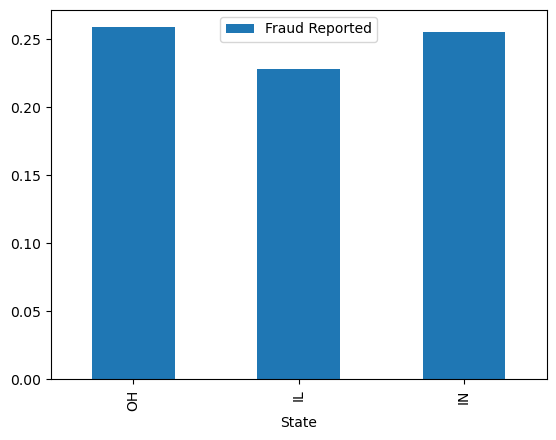

In [243]:
# create a new dataframe with fraud counts for all state groups
state_df = pd.DataFrame({
    'State': ['OH', 'IL', 'IN'],
    'Fraud Reported': [state[1], state1[1], state2[1]],
    'Not Reported': [state[0], state1[0], state2[0]]
})

# plot the data
state_df.plot(x='State', y=['Fraud Reported'], kind='bar')
plt.show()

In [222]:
"""In group insured in Ohio, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
state = df[df.policy_state == 'OH'].fraud_reported.value_counts(normalize=1)
print('Percent of Group Insured in Ohio Where Fraud Was Reported/Not Reported:')  
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', state[1]))
print('{:<15} {:.2%}'.format('Not Reported', state[0]))

# Number of Insured in this group
print('\nNumber of Customers Insured In Ohio:')  
print((df.policy_state == 'OH').sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured in Ohio Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        25.85%
Not Reported    74.15%

Number of Customers Insured In Ohio:
352
-------------------------------------------------------------------------------------


In [223]:
"""In group insured in Illinois, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
state1 = df[df.policy_state == 'IL'].fraud_reported.value_counts(normalize=1)
print('Percent of Group Insured in Illinois Where Fraud Was Reported/Not Reported:')  
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', state1[1])) 
print('{:<15} {:.2%}'.format('Not Reported', state1[0])) 

# Number of Insured in this group
print('\nNumber of Customers Insured In Illinois:')  
print((df.policy_state == 'IL').sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured in Illinois Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        22.78%
Not Reported    77.22%

Number of Customers Insured In Illinois:
338
-------------------------------------------------------------------------------------


In [224]:
"""In group insured in Indiana, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
state2 = df[df.policy_state == 'IN'].fraud_reported.value_counts(normalize=1)
print('Percent of Group Insured in Indiana Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', state2[1])) 
print('{:<15} {:.2%}'.format('Not Reported', state2[0]))


# Number of Insured in this group
print('\nNumber of Customers Insured In Indiana:')  
print((df.policy_state == 'IN').sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured in Indiana Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        25.48%
Not Reported    74.52%

Number of Customers Insured In Indiana:
310
-------------------------------------------------------------------------------------


# Insured Gender Analysis

**Segment customers, per gender, to identify possible trends of fraud and visualize data**   
* Males are 463 or 46.3% of customers   
* Females are 537 or 53.7% of customers



**Males had a higher rate of fraud reported than females**
* Males = 26.13%  
* Females = 23.46%

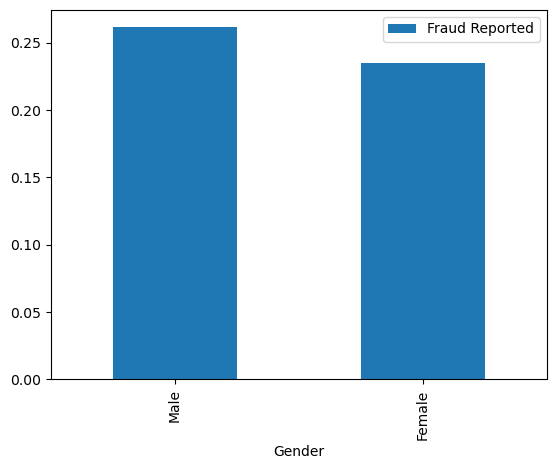

In [370]:
# Create new dataframe for fraud visualization
gender = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Fraud Reported': [male[1], female[1]],
    'Not Reported': [male[0], female[0]]
})

# plot the data
gender.plot(x='Gender', y=['Fraud Reported'], kind='bar')
plt.show()

In [225]:
"""In male customers, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
male = df[df.insured_sex == 'MALE'].fraud_reported.value_counts(normalize=1)
print('Percent of Group Insured in Indiana Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', male[1])) 
print('{:<15} {:.2%}'.format('Not Reported', male[0]))

# Number of Insured in this group
print('\nNumber of Male Customers:')  
print((df.insured_sex == 'MALE').sum())
print('-------------------------------------------------------------------------------------')

Percent of Group Insured in Indiana Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        26.13%
Not Reported    73.87%

Number of Male Customers:
463
-------------------------------------------------------------------------------------


In [226]:
"""In female customers, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
female = df[df.insured_sex == 'FEMALE'].fraud_reported.value_counts(normalize=1)
print('Percent of Female Customers Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent'))
print('{:<15} {:.2%}'.format('Reported', female[1])) 
print('{:<15} {:.2%}'.format('Not Reported', female[0])) 

# Number of Insured in this group
print('\nNumber of Female Customers:')  
print((df.insured_sex == 'FEMALE').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Female Customers Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        23.46%
Not Reported    76.54%

Number of Female Customers:
537
-------------------------------------------------------------------------------------


# Insured Education Level Analysis

**Segment customers, by education level, to identify possible trends of fraud and visualize data**

**Customer education level, as a percentage, of fraud reported in insurance claims**  
* JD = 26.09%    
* HS = 22.50%    
* ASC = 23.45%    
* MD = 26.39%    
* MS = 22.38%    
* PhD = 26.40%    
* BAC = 26.23%    

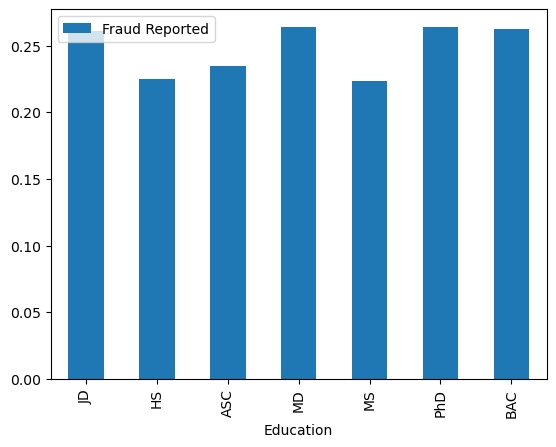

In [249]:
# Create new dataframe for fraud visualization
ed_df = pd.DataFrame({
    'Education': ['JD', 'HS', 'ASC', 'MD', 'MS', 'PhD', 'BAC'],
    'Fraud Reported': [ed_jd[1], ed_hs[1], ed_asc[1], ed_md[1], ed_ms[1], ed_phd[1], ed_bac[1]],
    'Not Reported': [ed_jd[0], ed_hs[0], ed_asc[0], ed_md[0], ed_ms[0], ed_phd[0], ed_bac[0]]
})

# plot the data
ed_df.plot(x='Education', y=['Fraud Reported'], kind='bar')
plt.show()

In [227]:
"""In JD education level customers, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
ed_jd = df[df.insured_education_level == 'JD'].fraud_reported.value_counts(normalize=1)
print('Percent of Customers with JD Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ed_jd[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ed_jd[0])) 

# Number of Insured in this group
print('\nNumber of Customers In This Group:')  
print((df.insured_education_level == 'JD').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Customers with JD Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        26.09%
Not Reported    73.91%

Number of Customers In This Group:
161
-------------------------------------------------------------------------------------


In [228]:
"""In high school education level customers, percentage of insurance claims where fraud was either
reported or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
ed_hs = df[df.insured_education_level == 'High School'].fraud_reported.value_counts(normalize=1)
print('Percent of Customers with High School Diplomas Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ed_hs[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ed_hs[0])) 

# Number of Insured in this group
print('\nNumber of Customers In This Group:')  
print((df.insured_education_level == 'High School').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Customers with High School Diplomas Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        22.50%
Not Reported    77.50%

Number of Customers In This Group:
160
-------------------------------------------------------------------------------------


In [229]:
"""In associate degree education level customers, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
ed_asc = df[df.insured_education_level == 'Associate'].fraud_reported.value_counts(normalize=1)
print('Percent of Customers with Associate Degrees Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ed_asc[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ed_asc[0])) 

# Number of Insured in this group
print('\nNumber of Customers In This Group:')  
print((df.insured_education_level == 'Associate').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Customers with Associate Degrees Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        23.45%
Not Reported    76.55%

Number of Customers In This Group:
145
-------------------------------------------------------------------------------------


In [230]:
"""In MD education level customers, percentage of insurance claims where fraud was either reported
   or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
ed_md = df[df.insured_education_level == 'MD'].fraud_reported.value_counts(normalize=1)
print('Percent of Customers with MD Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ed_md[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ed_md[0])) 

# Number of Insured in this group
print('\nNumber of Customers In This Group:')  
print((df.insured_education_level == 'MD').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Customers with MD Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        26.39%
Not Reported    73.61%

Number of Customers In This Group:
144
-------------------------------------------------------------------------------------


In [231]:
"""In masters degree education customers, percentage of insurance claims where fraud was either 
reported or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
ed_ms = df[df.insured_education_level == 'Masters'].fraud_reported.value_counts(normalize=1)
print('Percent of Customers with Masters Degrees Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ed_ms[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ed_ms[0])) 

# Number of Insured in this group
print('\nNumber of Customers In This Group:')  
print((df.insured_education_level == 'Masters').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Customers with Masters Degrees Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        22.38%
Not Reported    77.62%

Number of Customers In This Group:
143
-------------------------------------------------------------------------------------


In [232]:
"""In PhD education level customers, percentage of insurance claims where fraud was either 
reported or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
ed_phd = df[df.insured_education_level == 'PhD'].fraud_reported.value_counts(normalize=1)
print('Percent of Customers with PhD Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ed_phd[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ed_phd[0])) 

# Number of Insured in this group
print('\nNumber of Customers In This Group:')  
print((df.insured_education_level == 'PhD').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Customers with PhD Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        26.40%
Not Reported    73.60%

Number of Customers In This Group:
125
-------------------------------------------------------------------------------------


In [233]:
"""In bachelors degree education level customers, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the group"""

# Create/print variable for percentage of (fraud/no fraud) reported in customer group
ed_bac = df[df.insured_education_level == 'College'].fraud_reported.value_counts(normalize=1)
print('Percent of Customers with Bachelor Degrees Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ed_bac[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ed_bac[0])) 

# Number of Insured in this group
print('\nNumber of Customers In This Group:')  
print((df.insured_education_level == 'College').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Customers with Bachelor Degrees Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        26.23%
Not Reported    73.77%

Number of Customers In This Group:
122
-------------------------------------------------------------------------------------


# Incident Date Analysis

**Day of week, as a percentage, of fraud reported in insurance claims**  
* Monday = 29.41%      
* Tuesday = 19.26%      
* Wednesday = 22.07%    
* Thursday = 24.31%    
* Friday = 23.94%   
* Saturday = 28.31%    
* Sunday = 25.00%  

**Claims per day as a number and percentage**
* Monday = 136 / 13.6%  
* Tuesday = 135 / 13.5%  
* Wednesday = 145 / 14.5%  
* Thursday = 144 / 14.4%  
* Friday = 142 / 14.2%  
* Saturday = 166 / 16.6%  
* Sunday = 132 / 13.2%  

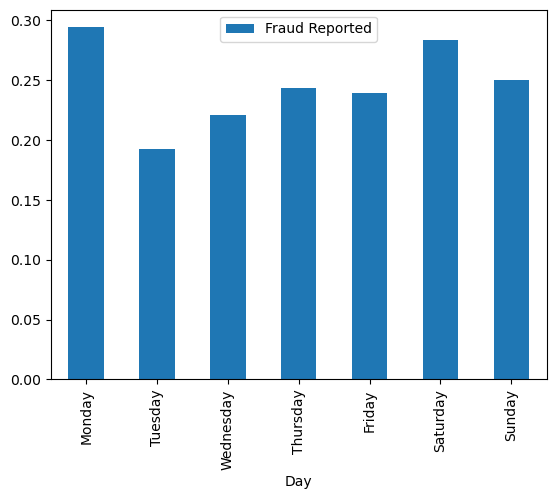

In [277]:
# Create new dataframe for fraud visualization
day = pd.DataFrame({
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Fraud Reported': [monday[1], tuesday[1], wednesday[1], thursday[1], friday[1], saturday[1], sunday[1]],
    'Not Reported': [monday[0], tuesday[0], wednesday[0], thursday[0], friday[0], saturday[0], sunday[0]]
})

# plot the data
day.plot(x='Day', y=['Fraud Reported'], kind='bar')
plt.show()

In [258]:
# Convert incident date from object to datetime64
df['incident_date'] = pd.to_datetime(df['incident_date'])  
# Convert incident date to a day of week variable
df['day_of_week'] = df['incident_date'].dt.dayofweek

In [269]:
"""On Monday, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the day"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
monday = df[df.day_of_week == 0].fraud_reported.value_counts(normalize=1)
print('Percent of Claims on Monday Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', monday[1])) 
print('{:<15} {:.2%}'.format('Not Reported', monday[0])) 

# Number of Claims in this group
print('\nNumber of Claims on Monday:')  
print((df.day_of_week == 0).sum()) 
print('-------------------------------------------------------------------------------------')


Percent of Claims on Monday Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        29.41%
Not Reported    70.59%

Number of Claims on Monday:
136
-------------------------------------------------------------------------------------


In [270]:
"""On Tuesday, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the day"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
tuesday = df[df.day_of_week == 1].fraud_reported.value_counts(normalize=1)
print('Percent of Claims on Tuesday Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', tuesday[1])) 
print('{:<15} {:.2%}'.format('Not Reported', tuesday[0])) 

# Number of Insured in this group
print('\nNumber of Claims on Tuesday:')  
print((df.day_of_week == 1).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims on Tuesday Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        19.26%
Not Reported    80.74%

Number of Claims on Tuesday:
135
-------------------------------------------------------------------------------------


In [271]:
"""On Wednesday, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the day"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
wednesday = df[df.day_of_week == 2].fraud_reported.value_counts(normalize=1)
print('Percent of Claims on Wednesday Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', wednesday[1])) 
print('{:<15} {:.2%}'.format('Not Reported', wednesday[0])) 

# Number of Insured in this group
print('\nNumber of Claims on Wednesday:')  
print((df.day_of_week == 2).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims on Wednesday Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        22.07%
Not Reported    77.93%

Number of Claims on Wednesday:
145
-------------------------------------------------------------------------------------


In [272]:
"""On Thursday, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the day"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
thursday = df[df.day_of_week == 3].fraud_reported.value_counts(normalize=1)
print('Percent of Claims on Thursday Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', thursday[1])) 
print('{:<15} {:.2%}'.format('Not Reported', thursday[0])) 

# Number of Insured in this group
print('\nNumber of Claims on Thursday:')  
print((df.day_of_week == 3).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims on Thursday Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        24.31%
Not Reported    75.69%

Number of Claims on Thursday:
144
-------------------------------------------------------------------------------------


In [273]:
"""On Friday, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the day"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
friday = df[df.day_of_week == 4].fraud_reported.value_counts(normalize=1)
print('Percent of Claims on Friday Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', friday[1])) 
print('{:<15} {:.2%}'.format('Not Reported', friday[0])) 

# Number of Insured in this group
print('\nNumber of Claims on Friday:')  
print((df.day_of_week == 4).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims on Friday Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        23.94%
Not Reported    76.06%

Number of Claims on Friday:
142
-------------------------------------------------------------------------------------


In [274]:
"""On Saturday, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the day"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
saturday = df[df.day_of_week == 5].fraud_reported.value_counts(normalize=1)
print('Percent of Claims on Saturday Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', saturday[1])) 
print('{:<15} {:.2%}'.format('Not Reported', saturday[0])) 

# Number of Insured in this group
print('\nNumber of Claims on Saturday:')  
print((df.day_of_week == 5).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims on Saturday Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        28.31%
Not Reported    71.69%

Number of Claims on Saturday:
166
-------------------------------------------------------------------------------------


In [275]:
"""On Sunday, percentage of insurance claims where fraud was 
either reported or not reported as well as total of the day"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
sunday = df[df.day_of_week == 6].fraud_reported.value_counts(normalize=1)
print('Percent of Claims on Sunday Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', sunday[1])) 
print('{:<15} {:.2%}'.format('Not Reported', sunday[0])) 

# Number of Insured in this group
print('\nNumber of Claims on Sunday:')  
print((df.day_of_week == 6).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims on Sunday Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        25.00%
Not Reported    75.00%

Number of Claims on Sunday:
132
-------------------------------------------------------------------------------------


# Incident Type Analysis

**Segment claims by incident type to identify possible trends of fraud and visualize data**  

**Claims per incident type as a number and percentage**  
* Multi Vehicle =  419 / 41.9%  
* Single Vehicle = 403 / 40.3%  
* Vehicle Theft = 94 / 9.4%  
* Parked Vehicle = 84 / 8.4%  

**Incident Type, as a percentage, of fraud reported in insurance claims**    
* Multi Vehicle  = 27.21%
* Single Vehicle = 29.03%
* Vehicle Theft = 8.51% 
* Parked Vehicle = 9.52%


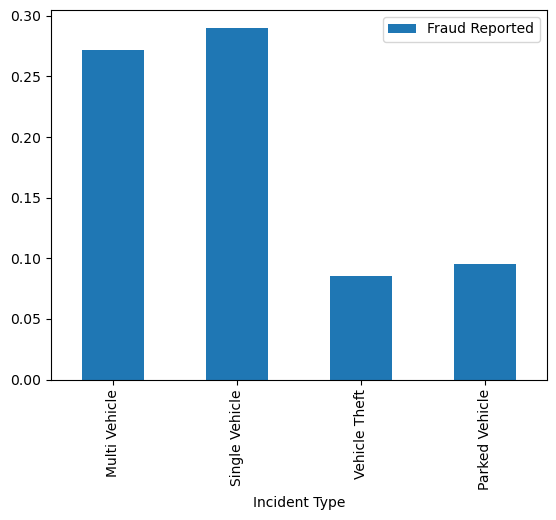

In [307]:
# Create new dataframe for fraud visualization
incident = pd.DataFrame({
    'Incident Type': ['Multi Vehicle', 'Single Vehicle', 'Vehicle Theft', 'Parked Vehicle'],
    'Fraud Reported': [multi[1], single[1], theft[1], parked[1]],
    'Not Reported': [multi[0], single[0], theft[0], parked[0]]
})

# plot the data
incident.plot(x='Incident Type', y=['Fraud Reported'], kind='bar')
plt.show()

In [303]:
"""Per incident type, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
multi = df[df.incident_type == 'Multi-vehicle Collision'].fraud_reported.value_counts(normalize=1)
print('Percent of Multi Vehicle Collision Claims Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', multi[1])) 
print('{:<15} {:.2%}'.format('Not Reported', multi[0])) 

# Number of Incidents in this group
print('\nNumber of Multi Vehicle Claims:')  
print((df.incident_type == 'Multi-vehicle Collision').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Multi Vehicle Collision Claims Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        27.21%
Not Reported    72.79%

Number of Multi Vehicle Claims:
419
-------------------------------------------------------------------------------------


In [304]:
"""Per incident type, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
single = df[df.incident_type == 'Single Vehicle Collision'].fraud_reported.value_counts(normalize=1)
print('Percent of Single Vehicle Collision Claims Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', single[1])) 
print('{:<15} {:.2%}'.format('Not Reported', single[0])) 

# Number of Incidents in this group
print('\nNumber of Single Vehicle Claims:')  
print((df.incident_type == 'Single Vehicle Collision').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Single Vehicle Collision Claims Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        29.03%
Not Reported    70.97%

Number of Single Vehicle Claims:
403
-------------------------------------------------------------------------------------


In [305]:
"""Per incident type, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
theft = df[df.incident_type == 'Vehicle Theft'].fraud_reported.value_counts(normalize=1)
print('Percent of Vehicle Theft Claims Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', theft[1])) 
print('{:<15} {:.2%}'.format('Not Reported', theft[0])) 

# Number of Incidents in this group
print('\nNumber of Vehicle Theft Claims:')  
print((df.incident_type == 'Vehicle Theft').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Vehicle Theft Claims Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        8.51%
Not Reported    91.49%

Number of Vehicle Theft Claims:
94
-------------------------------------------------------------------------------------


In [306]:
"""Per incident type, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
parked = df[df.incident_type == 'Parked Car'].fraud_reported.value_counts(normalize=1)
print('Percent of Parked Car Claims Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', parked[1])) 
print('{:<15} {:.2%}'.format('Not Reported', parked[0])) 

# Number of Incidents in this group
print('\nNumber of Parked Car Claims:')  
print((df.incident_type == 'Parked Car').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Parked Car Claims Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        9.52%
Not Reported    90.48%

Number of Parked Car Claims:
84
-------------------------------------------------------------------------------------


# State Incident Occurred In Analysis
 

**Claims per state incident occurred in as a number and percentage**  
* NY = 262 / 26.2%
* SC = 248 / 24.8%   
* WV = 217 / 21.7%  
* VA = 110 / 11%  
* NC = 110 / 11% 
* PA = 30 / 3%
* OH = 23 / 2.3%

**State incident occurred, as a percentage, of fraud reported in insurance claims**  
* NY =  22.14%  
* SC =  29.44%  
* WV =  17.97%  
* VA =  22.73%  
* NC =  30.91%   
* PA =  26.67%  
* OH =  43.48%


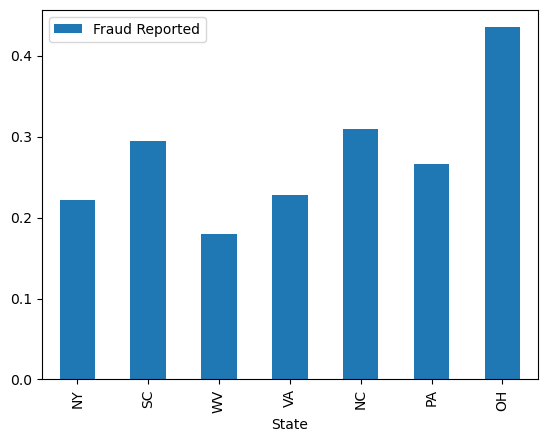

In [324]:
# Create new dataframe for fraud visualization
inc_state = pd.DataFrame({
    'State': ['NY', 'SC', 'WV', 'VA', 'NC', 'PA', 'OH'],
    'Fraud Reported': [ny[1], sc[1], wv[1], va[1], nc[1], pa[1], oh[1]],
    'Not Reported': [ny[0], sc[0], wv[0], va[0], nc[0], pa[0], oh[0]]
})

# plot the data
inc_state.plot(x='State', y=['Fraud Reported'], kind='bar')
plt.show()

In [315]:
"""Per incident state, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
ny = df[df.incident_state == 'NY'].fraud_reported.value_counts(normalize=1)
print('Percent of Claims in NY Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', ny[1])) 
print('{:<15} {:.2%}'.format('Not Reported', ny[0])) 

# Number of Incidents in this group
print('\nNumber of Claims in NY:')  
print((df.incident_state == 'NY').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims in NY Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        22.14%
Not Reported    77.86%

Number of Claims in NY:
262
-------------------------------------------------------------------------------------


In [316]:
"""Per incident state, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
sc = df[df.incident_state == 'SC'].fraud_reported.value_counts(normalize=1)
print('Percent of Claims in SC Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', sc[1])) 
print('{:<15} {:.2%}'.format('Not Reported', sc[0])) 

# Number of Incidents in this group
print('\nNumber of Claims in SC:')  
print((df.incident_state == 'SC').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims in SC Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        29.44%
Not Reported    70.56%

Number of Claims in SC:
248
-------------------------------------------------------------------------------------


In [317]:
"""Per incident state, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
wv = df[df.incident_state == 'WV'].fraud_reported.value_counts(normalize=1)
print('Percent of Claims in WV Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', wv[1])) 
print('{:<15} {:.2%}'.format('Not Reported', wv[0])) 

# Number of Incidents in this group
print('\nNumber of Claims in WV:')  
print((df.incident_state == 'WV').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims in WV Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        17.97%
Not Reported    82.03%

Number of Claims in WV:
217
-------------------------------------------------------------------------------------


In [318]:
"""Per incident state, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
va = df[df.incident_state == 'VA'].fraud_reported.value_counts(normalize=1)
print('Percent of Claims in VA Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', va[1])) 
print('{:<15} {:.2%}'.format('Not Reported', va[0])) 

# Number of Incidents in this group
print('\nNumber of Claims in VA:')  
print((df.incident_state == 'VA').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims in VA Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        22.73%
Not Reported    77.27%

Number of Claims in VA:
110
-------------------------------------------------------------------------------------


In [319]:
"""Per incident state, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
nc = df[df.incident_state == 'NC'].fraud_reported.value_counts(normalize=1)
print('Percent of Claims in NC Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', nc[1])) 
print('{:<15} {:.2%}'.format('Not Reported', nc[0])) 

# Number of Incidents in this group
print('\nNumber of Claims in NC:')  
print((df.incident_state == 'NC').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims in NC Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        30.91%
Not Reported    69.09%

Number of Claims in NC:
110
-------------------------------------------------------------------------------------


In [322]:
"""Per incident state, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
pa = df[df.incident_state == 'PA'].fraud_reported.value_counts(normalize=1)
print('Percent of Claims in PA Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', pa[1])) 
print('{:<15} {:.2%}'.format('Not Reported', pa[0])) 

# Number of Incidents in this group
print('\nNumber of Claims in PA:')  
print((df.incident_state == 'PA').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims in PA Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        26.67%
Not Reported    73.33%

Number of Claims in PA:
30
-------------------------------------------------------------------------------------


In [320]:
"""Per incident state, percentage of insurance claims where fraud was 
either reported or not reported as well as total of incident type"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
oh = df[df.incident_state == 'OH'].fraud_reported.value_counts(normalize=1)
print('Percent of Claims in OH Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', oh[1])) 
print('{:<15} {:.2%}'.format('Not Reported', oh[0])) 

# Number of Incidents in this group
print('\nNumber of Claims in OH:')  
print((df.incident_state == 'OH').sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claims in OH Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        43.48%
Not Reported    56.52%

Number of Claims in OH:
23
-------------------------------------------------------------------------------------


# Number of Witnesses per Claim Analysis

**Segment number of witnesses to identify possible trends of fraud and visualize data**

**Claims per witnesses as a number and percentage**  
* 0 = 258 / 25.8%  
* 1 = 250 / 25%  
* 2 = 249 / 24.9%  
* 3 = 243 / 24.3%  

**Witnesses, as a percentage, of fraud reported in insurance claims**  
* 0 = 20.08%  
* 1 = 24.42%  
* 2 = 29.6%  
* 3 = 24.69%  

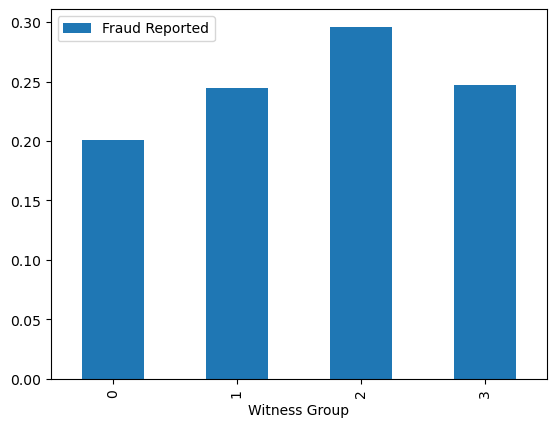

In [344]:
# Create new dataframe for fraud visualization
witness = pd.DataFrame({
    'Witness Group': ['0', '1', '2', '3'],
    'Fraud Reported': [zero[1], one[1], two[1], three[1]],
    'Not Reported': [zero[0], one[0], two[0], three[0]]
})

# plot the data
witness.plot(x='Witness Group', y=['Fraud Reported'], kind='bar')
plt.show()

In [339]:
"""Witnesses, percentage of insurance claims where fraud was 
either reported or not reported as well as total of witnesses"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
zero = df[df.witnesses == 0].fraud_reported.value_counts(normalize=1)
print('Percent of Witnesses Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', zero[1])) 
print('{:<15} {:.2%}'.format('Not Reported', zero[0])) 

# Number of Witnesses 
print('\nNumber of Witnesses(0):')  
print((df.witnesses == 0).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Witnesses Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        20.08%
Not Reported    79.92%

Number of Witnesses:
249
-------------------------------------------------------------------------------------


In [340]:
"""Witnesses, percentage of insurance claims where fraud was 
either reported or not reported as well as total of witnesses"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
one = df[df.witnesses == 1].fraud_reported.value_counts(normalize=1)
print('Percent of Witnesses Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', one[1])) 
print('{:<15} {:.2%}'.format('Not Reported', one[0])) 

# Number of Witnesses 
print('\nNumber of Witnesses(1):')  
print((df.witnesses == 1).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Witnesses Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        24.42%
Not Reported    75.58%

Number of Witnesses:
258
-------------------------------------------------------------------------------------


In [341]:
"""Witnesses, percentage of insurance claims where fraud was 
either reported or not reported as well as total of witnesses"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
two = df[df.witnesses == 2].fraud_reported.value_counts(normalize=1)
print('Percent of Witnesses Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', two[1])) 
print('{:<15} {:.2%}'.format('Not Reported', two[0])) 

# Number of Witnesses
print('\nNumber of Witnesses(2):')  
print((df.witnesses == 2).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Witnesses Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        29.60%
Not Reported    70.40%

Number of Witnesses:
250
-------------------------------------------------------------------------------------


In [342]:
"""Witnesses, percentage of insurance claims where fraud was 
either reported or not reported as well as total of witnesses"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
three = df[df.witnesses == 3].fraud_reported.value_counts(normalize=1)
print('Percent of Witnesses Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', three[1])) 
print('{:<15} {:.2%}'.format('Not Reported', three[0])) 

# Number of Witnesses
print('\nNumber of Witnesses(3):')  
print((df.witnesses == 3).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Witnesses Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        24.69%
Not Reported    75.31%

Number of Witnesses(3):
243
-------------------------------------------------------------------------------------


# Total Claim Amount Analysis

**Segment claims of insured, in 25k segments, to identify possible trends of fraud and visualize data**

**Claims group with highest rate of fraud reported**  
* <= 25k = 9.3%  
* 25k - 50k = 21.88%  
* 50k - 75k = 30.84%  
* 75k - 100k = 26.97%   
* 100k+ = 23.08%

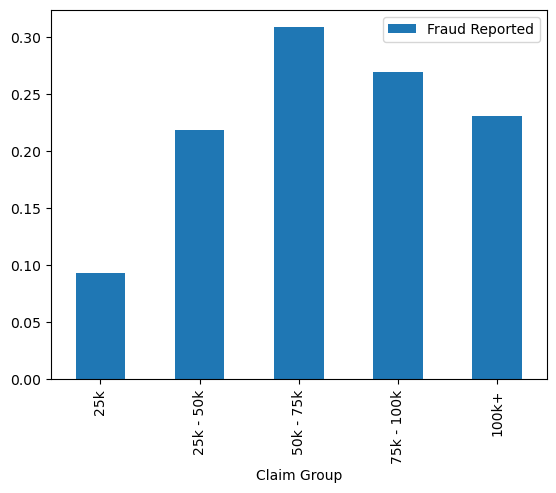

In [362]:
# Create new dataframe for fraud visualization
claims = pd.DataFrame({
    'Claim Group': ['25k', '25k - 50k', '50k - 75k', '75k - 100k', '100k+'],
    'Fraud Reported': [first[1], second[1], third[1], forth[1], fifth[1]],
    'Not Reported': [first[0], second[0], third[0], forth[0], fifth[0]]
})

# plot the data
claims.plot(x='Claim Group', y=['Fraud Reported'], kind='bar')
plt.show()

In [356]:
"""Total claim amount, where fraud was either reported or not reported as well as the count"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
first = df[(df.total_claim_amount <= 25000)].fraud_reported.value_counts(normalize=1)
print('Percent of Claim Amount Group (<$25k) Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', first[1])) 
print('{:<15} {:.2%}'.format('Not Reported', first[0])) 

# Number of Claims in group
print('\nNumber of Claims in Group:')  
print((df.total_claim_amount <= 25000).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claim Amount Group (<$25k) Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        9.34%
Not Reported    90.66%

Number of Claims in Group:
182
-------------------------------------------------------------------------------------


In [358]:
"""Total claim amount, where fraud was either reported or not reported as well as the count"""


# Create/print variable for percentage of (fraud/no fraud) reported in claim group
second = df[(df.total_claim_amount >= 25001) & (df.total_claim_amount <= 50000)].fraud_reported.value_counts(normalize=1) 
print('Percent of Claim Amount Group ($25k - $50k) Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', second[1])) 
print('{:<15} {:.2%}'.format('Not Reported', second[0])) 

# Number of Witnesses
print('\nNumber of Claims in Group:')  
print(((df.total_claim_amount >= 25001) & (df.total_claim_amount <= 50000)).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claim Amount Group ($25k - $50k) Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        21.88%
Not Reported    78.12%

Number of Claims in Group:
160
-------------------------------------------------------------------------------------


In [359]:
"""Total claim amount, where fraud was either reported or not reported as well as the count"""


# Create/print variable for percentage of (fraud/no fraud) reported in claim group
third = df[(df.total_claim_amount >= 50001) & (df.total_claim_amount <= 75000)].fraud_reported.value_counts(normalize=1) 
print('Percent of Claim Amount Group ($50k - $75k) Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', third[1])) 
print('{:<15} {:.2%}'.format('Not Reported', third[0])) 

# Number of Witnesses
print('\nNumber of Claims in Group:')  
print(((df.total_claim_amount >= 50001) & (df.total_claim_amount <= 75000)).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claim Amount Group ($50k - $75k) Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        30.84%
Not Reported    69.16%

Number of Claims in Group:
467
-------------------------------------------------------------------------------------


In [360]:
"""Total claim amount, where fraud was either reported or not reported as well as the count"""


# Create/print variable for percentage of (fraud/no fraud) reported in claim group
forth = df[(df.total_claim_amount >= 75001) & (df.total_claim_amount <= 100000)].fraud_reported.value_counts(normalize=1) 
print('Percent of Claim Amount Group ($75k - $100k) Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', forth[1])) 
print('{:<15} {:.2%}'.format('Not Reported', forth[0])) 

# Number of Witnesses
print('\nNumber of Claims in Group:')  
print(((df.total_claim_amount >= 75001) & (df.total_claim_amount <= 100000)).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claim Amount Group ($75k - $100k) Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        26.97%
Not Reported    73.03%

Number of Claims in Group:
178
-------------------------------------------------------------------------------------


In [361]:
"""Total claim amount, where fraud was either reported or not reported as well as the count"""


# Create/print variable for percentage of (fraud/no fraud) reported in claim group
fifth = df[(df.total_claim_amount >= 100001)].fraud_reported.value_counts(normalize=1) 
print('Percent of Claim Amount Group ($100k+) Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', fifth[1])) 
print('{:<15} {:.2%}'.format('Not Reported', fifth[0])) 

# Number of Witnesses
print('\nNumber of Claims in Group:')  
print((df.total_claim_amount >= 100001).sum()) 
print('-------------------------------------------------------------------------------------')

Percent of Claim Amount Group ($100k+) Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        23.08%
Not Reported    76.92%

Number of Claims in Group:
13
-------------------------------------------------------------------------------------


# Collision Type Analysis

**Segment collision types to identify possible trends of fraud and visualize data**

**Collision Type with highest rate of fraud reported as a number and percentage**

* Rear Collision = 292 / 31.16%
* Side Collision = 276 / 25.36% 
* Front Collision = 254 / 27.56%
* Unknown Collision = 178 / 8.99%



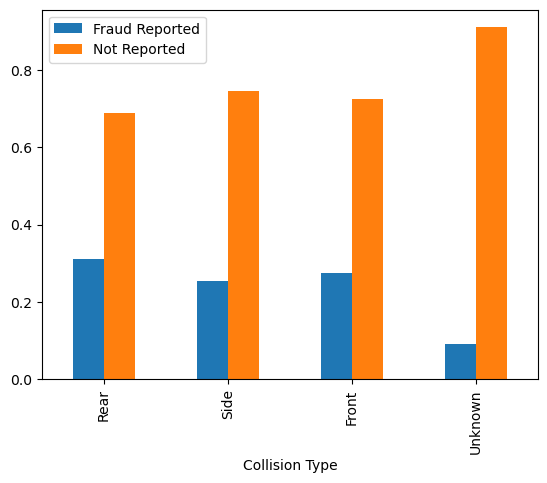

In [8]:
# Create new dataframe for fraud visualization
collisions = pd.DataFrame({
    'Collision Type': ['Rear', 'Side', 'Front', 'Unknown'],
    'Fraud Reported': [rear[1], side[1], front[1], na[1]],
    'Not Reported': [rear[0], side[0], front[0], na[0]]
})

# plot the data
collisions.plot(x='Collision Type', y=['Fraud Reported', 'Not Reported'], kind='bar')
plt.show()

In [4]:
"""Collision Type where fraud was either reported or not reported as well as the count"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
rear = df[df.collision_type == 'Rear Collision'].fraud_reported.value_counts(normalize=1)
print('Rear Collisions Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', rear[1]))
print('{:<15} {:.2%}'.format('Reported', rear[0]))


print('\nNumber in Rear Collisions Group:')  
print((df.collision_type == 'Rear Collision').sum()) 
print('-------------------------------------------------------------------------------------')


Rear Collisions Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        31.16%
Reported        68.84%

Number in Rear Collisions Group:
292
-------------------------------------------------------------------------------------


In [5]:
"""Collision Type where fraud was either reported or not reported as well as the count"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
side = df[df.collision_type == 'Side Collision'].fraud_reported.value_counts(normalize=1)
print('Side Collisions Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', side[1]))
print('{:<15} {:.2%}'.format('Reported', side[0]))

print('\nNumber in Side Collisions Group:')  
print((df.collision_type == 'Rear Collision').sum()) 
print('-------------------------------------------------------------------------------------')

Side Collisions Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        25.36%
Reported        74.64%

Number in Side Collisions Group:
292
-------------------------------------------------------------------------------------


In [6]:
"""Collision Type where fraud was either reported or not reported as well as the count"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
front = df[df.collision_type == 'Front Collision'].fraud_reported.value_counts(normalize=1)
print('Front Collisions Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', front[1]))
print('{:<15} {:.2%}'.format('Reported', front[0]))

print('\nNumber in Front Collisions Group:')  
print((df.collision_type == 'Front Collision').sum()) 
print('-------------------------------------------------------------------------------------')

Front Collisions Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        27.56%
Reported        72.44%

Number in Front Collisions Group:
254
-------------------------------------------------------------------------------------


In [13]:
"""Collision Type where fraud was either reported or not reported as well as the count"""

# Create/print variable for percentage of (fraud/no fraud) reported in claim group
na = df[df.collision_type == '?'].fraud_reported.value_counts(normalize=1)
print('Unknown Collisions Types Where Fraud Was Reported/Not Reported:') 
print('{:<15} {:<10}'.format('Fraud', 'Percent')) 
print('{:<15} {:.2%}'.format('Reported', na[1]))
print('{:<15} {:.2%}'.format('Reported', na[0]))

print('\nNumber in Unknown Collisions Group:')  
print((df.collision_type == '?').sum()) 
print('-------------------------------------------------------------------------------------')

Unknown Collisions Types Where Fraud Was Reported/Not Reported:
Fraud           Percent   
Reported        8.99%
Reported        91.01%

Number in Unknown Collisions Group:
178
-------------------------------------------------------------------------------------


In [12]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64